# Exercise Introduction

The TV show *Silicon Valley* had an app called "See Food" that promised to identify food in pictures (demo of the app [in this tense scene](https://www.youtube.com/watch?v=ACmydtFDTGs)). 

In this exercise, you will use a pre-trained model and TensorFlow to build the engine for this app.

**Fork this notebook** and follow the steps below.

# 1) Create Image Paths
We have supplied image files to examine. Run the cell below to store the filepaths with the name `img_paths`.

In [1]:
from os.path import join

hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/hot_dog'

hot_dog_paths = [join(hot_dog_image_dir,filename) for filename in 
                            ['1000288.jpg',
                             '127117.jpg']]

not_hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/not_hot_dog'
not_hot_dog_paths = [join(not_hot_dog_image_dir, filename) for filename in
                            ['823536.jpg',
                             '99890.jpg']]

img_paths = hot_dog_paths + not_hot_dog_paths

# 2) Set Up Preprocessing
Copy the `read_and_prep_images` function from the instructional page into the cell below (replacing the stub for that function that is currently there).

In [4]:
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

In [6]:
help(preprocess_input)

Help on function wrapper in module tensorflow.python.keras.applications:

wrapper(*args, **kwargs)



In [12]:
image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    # load_img() : Returns a PIL Image instance
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths ]
    # img_to_array() : Convert PIL Image instance to numpy array 
    image_array = np.array([img_to_array(img) for img in imgs])
    return preprocess_input(image_array)

# 3) Modeling
1. Create a Resnet50 model and save it as `my_model`.
2. Apply the `read_and_prep_images` function to `img_paths` and save the result as `image_data`.
3. Use `my_model` to predict the contents of `image_data`.  Store the results in `my_preds`.

You can review the instructional page to remind yourself how to do this.

In [13]:
my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
image_data = read_and_prep_images(img_paths)
# returns Numpy array of prediction, computation is done in batches
my_preds = my_model.predict(image_data)

# 4) Visualize Your Results

Uncomment the lines below to visualize your results.

Import the `decode predictions` function we use to get the top labels. TensorFlow includes an alternative version of this function, but we'll use a version optimized for running on Kaggle Kernels.

In [14]:
import sys
from learntools.deep_learning.decode_predictions import decode_predictions

In [15]:
help(decode_predictions)

Help on function decode_predictions in module learntools.deep_learning.decode_predictions:

decode_predictions(preds, top=5, class_list_path=None)
    Decodes the prediction of an ImageNet model.
    Arguments:
        preds: Numpy tensor encoding a batch of predictions.
        top: integer, how many top-guesses to return.
        class_list_path: Path to the canonical imagenet_class_index.json file
    Returns:
        A list of lists of top class prediction tuples
        `(class_name, class_description, score)`.
        One list of tuples per sample in batch input.
    Raises:
        ValueError: in case of invalid shape of the `pred` array
            (must be 2D).



Uncomment the lines below to see the sample images and predictions

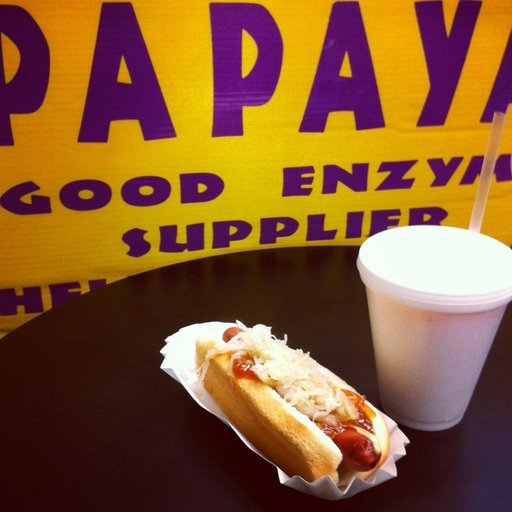

[('n07697537', 'hotdog', 0.94844335), ('n01981276', 'king_crab', 0.019266544), ('n07697313', 'cheeseburger', 0.0067496295)]


In [ ]:
from IPython.display import Image, display

most_likely_labels = decode_predictions(my_preds, top=3, class_list_path='../input/resnet50/imagenet_class_index.json')
for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

# Keep Going
You are ready for **[Transfer Learning](https://www.kaggle.com/dansbecker/transfer-learning/)**, which will allow you to apply the same level of power for your custom purposes.

---
**[Deep Learning Track Home](https://www.kaggle.com/learn/deep-learning)**